In [10]:
import sys

sys.path.append("..")

from matplotlib import pylab as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

from grid_definition import define_grid

In [7]:
def get_score(real, tag, daysahead):
    percentiles_path = (
        f"../data/processed/{tag}/percentiles_daysahead{daysahead}_R{real:03d}.csv"
    )
    df = pd.read_csv(percentiles_path)

    percentiles_true = np.array(df["TruePercentile"].tolist() + [100])
    score = 0

    percentiles_pred = np.array(df["ObservedPercentile"].tolist() + [100])
    score += np.trapz(np.abs(percentiles_true - percentiles_pred), percentiles_true)

    return score

In [32]:
# Search for minimum score
scores = {}

for k, method, delta_window, daysahead, tag in tqdm(define_grid()):
    key = (k, method, delta_window, tag)
    if key not in scores:
        scores[key] = 0
    scores[key] += get_score(0, tag, daysahead)

100%|█████████████████████████████████████████████████████████████████████████████| 2940/2940 [00:02<00:00, 1283.24it/s]


In [43]:
arr = np.array(list(scores.values()))

In [44]:
list(scores.items())[np.argmin(arr)]

((275, 'skew_gaussian', 2, 'skew_gaussian/k275/delta_window2'),
 472.8629422386445)

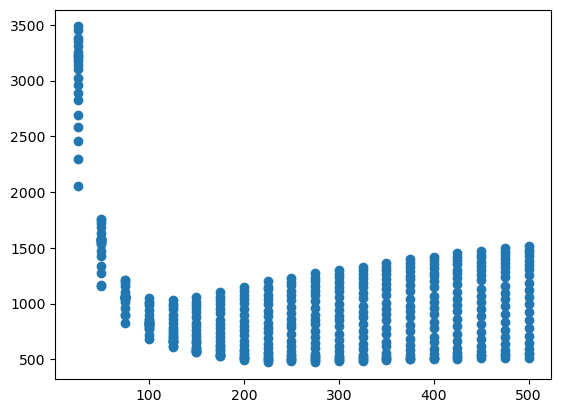

In [42]:
x = [k[0] for k, v in scores.items()]
y = [v for k, v in scores.items()]

plt.plot(x, y, "o")

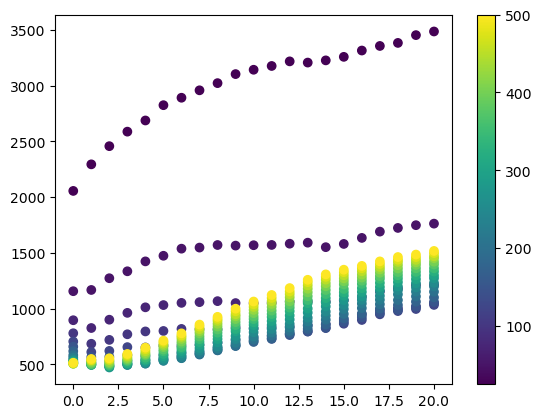

In [50]:
x = [k[2] for k, v in scores.items()]
y = [v for k, v in scores.items()]
c = [k[0] for k, v in scores.items()]
plt.scatter(x, y, c=c)
plt.colorbar()